# Trabalho Computacional 1: Modelos de Regresão e Classificação.
Alunos: Aluisio Gaspar de Menezes Cruz Neto 2013836, Clysman Lima Alves 2220304

Disponivel em: https://github.com/clys-man
__________


## Introdução
O presente trabalho é composto por duas etapas em que deve-se utilizar os conceitos de IA baseados
em modelos preditivos que realizam seu processo de aprendizagem através da minimização de uma
função custo (loss function). Em ambas etapas do trabalho, tais modelos utilizam o paradigma
supervisionado para aprender a partir de pares de amostra e valor observado. Contudo, a tarefa da
primeira etapa trata-se do desenvolvimento de um sistema que faz predições quantitativas (regressão),
ao passo que a segunda etapa é caracterizada pelo desenvolvimento de um sistema que realiza predições
qualitativas (classificação)

## Trabalho de Regressão

### Visualizando os dados

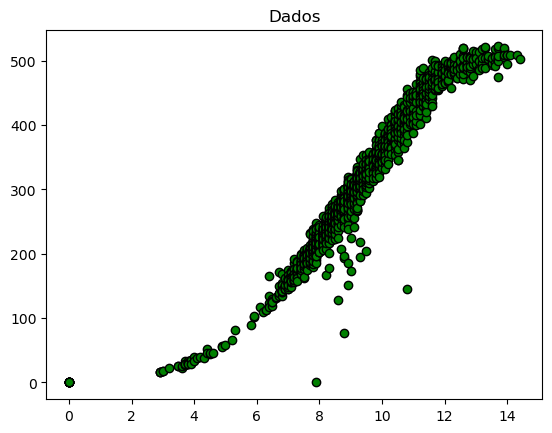

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Dados = np.genfromtxt("./data/aerogerador.dat", delimiter="\t", filling_values=np.nan)

Size = Dados.shape
x = Dados[:, 0].reshape(Size[0], 1)
y = Dados[:, 1].reshape(Size[0], 1)

plt.figure(1)
plt.scatter(x, y, color='green', edgecolors='k')
plt.title('Dados')
plt.show()

### Adicionando o interceptor

In [4]:
X = np.concatenate((np.ones((Size[0], 1)), x), axis=1)
print(X)

[[ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]
 ...
 [ 1.  14.1]
 [ 1.  14.3]
 [ 1.  14.4]]


### Realizando a implementação dos modelos

In [5]:
def linear_regression(X, y, regularization=None, lbda=0):
    if regularization == 'Tikhonov':
        # Ridge regression
        I = np.identity(X.shape[1])
        b_hat = np.linalg.inv(X.T @ X + lbda * I) @ X.T @ y
    else:
        # Standard linear regression
        b_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    return b_hat


def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Number of rounds for validation
num_rounds = 1000

# Lists to store mean squared errors for each model
mse_ols_list = []
mse_ridge_list = []
mse_mean_list = []
optimal_lambda_list = []

# Perform validation for each round
for _ in range(num_rounds):
    # Shuffle and split data into training (80%) and testing (20%)
    indices = np.random.permutation(Size[0])
    train_size = int(0.8 * Size[0])
    train_indices, test_indices = indices[:train_size], indices[train_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # Ordinary Least Squares (OLS) Regression
    b_hat_ols = linear_regression(X_train, y_train)
    y_pred_ols = X_test @ b_hat_ols
    mse_ols = mean_squared_error(y_test, y_pred_ols)
    mse_ols_list.append(mse_ols)

    # Ridge Regression with optimal lambda
    lambda_values = np.linspace(1e-5, 1.5, 100)
    mse_ridge_values = []
    for lbda in lambda_values:
        I = np.identity(X.shape[1])
        w_hat = np.linalg.inv(X.T @ X + lbda * I) @ X.T @ y
        y_pred_ridge = X_test @ w_hat
        mse_ridge = mean_squared_error(y_test, y_pred_ridge)
        mse_ridge_values.append(mse_ridge)

    optimal_lambda = lambda_values[np.argmin(mse_ridge_values)]
    optimal_lambda_list.append(optimal_lambda)

    I = np.identity(X.shape[1])
    w_hat_ridge = np.linalg.inv(X.T @ X + lbda * I) @ X.T @ y
    y_pred_ridge = X_test @ w_hat_ridge
    mse_ols_ridge = mean_squared_error(y_test, y_pred_ridge)
    mse_ridge_list.append(mse_ols_ridge)

    # Mean of Observable Values
    mean_y_train = np.mean(y_train)
    y_pred_mean = mean_y_train * np.ones_like(y_test)
    mse_mean_list.append(mean_squared_error(y_test, y_pred_mean))

### Calculando medidas de dispersão e posição

In [6]:
# Display summary statistics
mse_ols_mean = np.mean(mse_ols_list)
mse_ols_std = np.std(mse_ols_list)
mse_ols_max = np.max(mse_ols_list)
mse_ols_min = np.min(mse_ols_list)

mse_ridge_mean = np.mean(mse_ridge_list)
mse_ridge_std = np.std(mse_ridge_list)
mse_ridge_max = np.max(mse_ridge_list)
mse_ridge_min = np.min(mse_ridge_list)

mse_mean_mean = np.mean(mse_mean_list)
mse_mean_std = np.std(mse_mean_list)
mse_mean_max = np.max(mse_mean_list)
mse_mean_min = np.min(mse_mean_list)

# Display results
print("MQO: Mean MSE =", mse_ols_mean, "+/-", mse_ols_std, " | Min =", mse_ols_min, " | Max =", mse_ols_max)
print("Ridge/Tikhonov: Mean MSE =", mse_ridge_mean, "+/-", mse_ridge_std, " | Min =", mse_ridge_min, " | Max =", mse_ridge_max)
print("Optimal lambda (Ridge) =", np.mean(optimal_lambda_list))
print("Mean_Observed: Mean MSE =", mse_mean_mean, "+/-", mse_mean_std, " | Min =", mse_mean_min, " | Max =", mse_mean_max)

MQO: Mean MSE = 789.6942266829233 +/- 163.08962521521073  | Min = 423.7129845435318  | Max = 1414.6081777157465
Ridge/Tikhonov: Mean MSE = 782.7676124114628 +/- 156.0022378430823  | Min = 413.5923973950342  | Max = 1276.1129403800196
Optimal lambda (Ridge) = 0.6322330578787878
Mean_Observed: Mean MSE = 11155.641557131481 +/- 623.2890893742331  | Min = 9275.98072222222  | Max = 13353.021316358025


### Vizualizando os dados finais

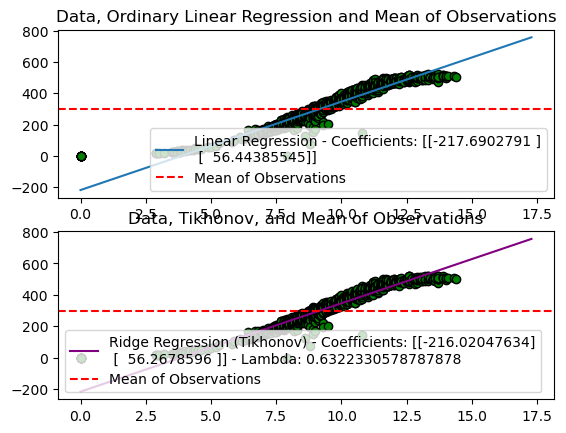

In [8]:
# Linear regression
b_hat_ols = linear_regression(X, y)
# Ridge regression with optimal lambda
optimal_lambda = np.mean(optimal_lambda_list)
w_hat_tk = linear_regression(X, y, "Tikhonov", optimal_lambda)
# Mean of Observable Values
mean_y = np.mean(y)

# Prediction
x1_axis = np.linspace(min(x[:, 0]), 1.2 * max(x[:, 0]), 2 * len(x[:, 0]))
y_hat_ols = b_hat_ols[0] + b_hat_ols[1] * x1_axis
y_hat_tk = w_hat_tk[0] + w_hat_tk[1] * x1_axis
y_hat_mean = mean_y * np.ones_like(x1_axis)

#plot models

plt.figure(2)
plt.subplot(2, 1,1)
plt.scatter(x, y, color='green', edgecolors='k')
plt.plot(x1_axis, y_hat_ols, label=f'Linear Regression - Coefficients: {b_hat_ols}')
plt.axhline(y=mean_y, color='red', linestyle='--', label='Mean of Observations')
plt.title('Data, Ordinary Linear Regression and Mean of Observations')
plt.legend()

plt.subplot(2, 1,2)
plt.scatter(x, y, color='green', edgecolors='k')
plt.plot(x1_axis, y_hat_tk, color="purple", label=f'Ridge Regression (Tikhonov) - Coefficients: {w_hat_tk} - Lambda: {optimal_lambda}')
plt.axhline(y=mean_y, color='red', linestyle='--', label='Mean of Observations')
plt.title('Data, Tikhonov, and Mean of Observations')
plt.legend()

plt.show()

## Trabalho de classificação

### Visualizando os dados

(50000, 2)
(50000, 5)


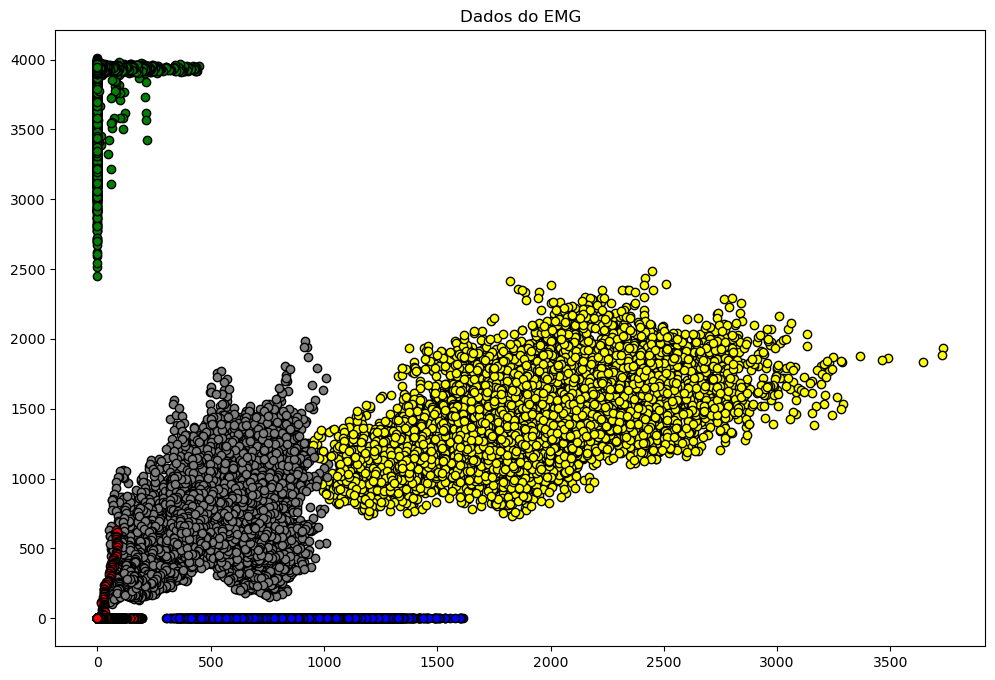

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics

# Carregar dados
X = np.loadtxt("./data/EMG.csv", delimiter=",")
color = ["red", "green", "blue", "gray", "yellow"]
z = 0
Y = np.empty((0, 5))

N, p = X.shape

plt.figure(figsize=(12, 8))
plt.title("Dados do EMG")
# Criar matriz de resposta Y
for i in range(10):
    for j in range(5):
        y = -np.ones((1000, 5))
        y[:, j] = 1
        Y = np.concatenate((Y, y))
        plt.scatter(X[z : z + 1000, 0], X[z : z + 1000, 1], color=color[j], edgecolors="k")
        z += 1000

print(X.shape)
print(Y.shape)

plt.show()

### Adicionando o interceptor

In [43]:
X_intercept = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

N_intercept, p_intercept = X.shape

### Realizando a implementação dos modelos

In [14]:
def dist(x, y):
    return np.linalg.norm(x - y)

def linear_regression(X, y, regularization=None, lbda=0):
    if regularization == 'Tikhonov':
        # Ridge regression
        I = np.identity(X.shape[1])
        b_hat = np.linalg.inv(X.T @ X + lbda * I) @ X.T @ y
    else:
        # Standard linear regression
        b_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    return b_hat

# Define the number of rounds
num_rounds = 5

models_data = {
    'OLS': [],
    'RIDGE': [],
    'KNN': [],
    'MDC': []
}

# Loop through rounds
for round in range(num_rounds):
    round_start = time.perf_counter_ns()

    print(f"Round {round + 1}")
    print("----------------------")

    seed = np.random.permutation(N)

    X_ = np.copy(X)[seed, :]
    Y_ = np.copy(Y)[seed, :]

    X_treino = X_[0 : int(N * 0.8), :]
    Y_treino = Y_[0 : int(N * 0.8), :]

    X_teste = X_[int(N * 0.8) :, :]
    Y_teste = Y_[int(N * 0.8) :, :]

    X_treino = np.concatenate((np.ones((X_treino.shape[0], 1)), X_treino), axis=1)
    X_teste = np.concatenate((np.ones((X_teste.shape[0], 1)), X_teste), axis=1)
    
    # OLS
    print("Iniciando ols...")
    start = time.perf_counter_ns()
    W_ols = linear_regression(X_treino, Y_treino)
    accuracy_ols = np.mean(np.argmax(X_teste @ W_ols, axis=1) == np.argmax(Y_teste, axis=1))

    models_data['OLS'].append({
        'data': W_ols,
        'accuracy': accuracy_ols
    })

    duration = time.perf_counter_ns() - start
    print(f"Finalizado em {duration // 1000000}ms.")
    print("----------------------\n")

    print("Iniciando ridge...")
    start = time.perf_counter_ns()
    lambda_values = np.linspace(1e-5, 1.5, 100)
    for lbda in lambda_values:
        W_ridge = linear_regression(X_treino, Y_treino, regularization='Tikhonov', lbda=lbda)
        accuracy_ridge = np.mean(np.argmax(X_teste @ W_ridge, axis=1) == np.argmax(Y_teste, axis=1))

        models_data['RIDGE'].append({
            'data': W_ridge,
            'lambda': lbda,
            'accuracy': accuracy_ridge
        })
    
    duration = time.perf_counter_ns() - start
    print(f"Finalizado em {duration // 1000000}ms.")
    print("----------------------\n")

    correct_predictions = 0
    num_test_points = X_teste.shape[0]

    X_treino = X_treino[:, 1:]
    X_teste = X_teste[:, 1:]

    print("calculando KNN...")
    # # KNN classifier with K=7
    K = 7
    for j in range(num_test_points):
        x_i = X_teste[j, :]

        distances = [dist(x_i, x_j) for x_j in X_treino]

        indices = np.argsort(distances)[:K]

        class_counts = np.sum(Y_treino[indices, :], axis=0)

        predicted_class = np.argmax(class_counts)
        true_class = np.argmax(Y_teste[j, :])

        # Check correctness and update counter
        if predicted_class == true_class:
            correct_predictions += 1

    # Calculate accuracy for the current round
    accuracy = correct_predictions / num_test_points
    models_data['KNN'].append({
        'accuracy': accuracy
    })

    print("Iniciando DMC...")
    start = time.perf_counter_ns()
    centroids = np.concatenate((
        np.mean(X_treino[Y_treino[:,0]==1,:],axis=0).reshape(1,2),
        np.mean(X_treino[Y_treino[:,1]==1,:],axis=0).reshape(1,2),
        np.mean(X_treino[Y_treino[:,2]==1,:],axis=0).reshape(1,2),
        np.mean(X_treino[Y_treino[:,3]==1,:],axis=0).reshape(1,2),
        np.mean(X_treino[Y_treino[:,4]==1,:],axis=0).reshape(1,2),
    ),axis=0)

    correct_predictions = 0

    for i in range(num_test_points):
        distances = np.linalg.norm(X_teste[i] - centroids, axis=1)
        predicted_class = np.argmin(distances)

        # Verificar se a classe prevista está correta
        if np.argmax(Y_teste[i]) == predicted_class:
            correct_predictions += 1

    accuracy = correct_predictions / num_test_points
    models_data['MDC'].append({
        'accuracy': accuracy
    })
    print(f"Finalizado em {duration // 1000000}ms.")
    print("----------------------\n")
    
    round_duration = time.perf_counter_ns() - round_start
    print(f"Round finalizado em {round_duration // 1000000}ms.")
    print("----------------------")
    print('\n')

Round 1
----------------------
Iniciando ols...
Finalizado em 18ms.
----------------------

Iniciando ridge...
Finalizado em 85ms.
----------------------

calculando KNN...
Iniciando DMC...
Finalizado em 85ms.
----------------------

Round finalizado em 1120049ms.
----------------------


Round 2
----------------------
Iniciando ols...
Finalizado em 1ms.
----------------------

Iniciando ridge...
Finalizado em 101ms.
----------------------

calculando KNN...
Iniciando DMC...
Finalizado em 101ms.
----------------------

Round finalizado em 1128064ms.
----------------------


Round 3
----------------------
Iniciando ols...
Finalizado em 1ms.
----------------------

Iniciando ridge...
Finalizado em 99ms.
----------------------

calculando KNN...
Iniciando DMC...
Finalizado em 99ms.
----------------------

Round finalizado em 1129101ms.
----------------------


Round 4
----------------------
Iniciando ols...
Finalizado em 1ms.
----------------------

Iniciando ridge...
Finalizado em 97ms.


### Calculando medidas de dispersão e posição

[('KNN', [{'accuracy': 0.999}, {'accuracy': 0.9989}, {'accuracy': 0.9994}, {'accuracy': 0.9987}, {'accuracy': 0.9993}]), ('MDC', [{'accuracy': 0.9608}, {'accuracy': 0.9613}, {'accuracy': 0.9613}, {'accuracy': 0.9604}, {'accuracy': 0.9607}]), ('OLS', [{'data': array([[ 7.75188034e-02, -9.56262382e-01, -3.77615927e-01,
        -3.81951736e-01, -1.36168876e+00],
       [-5.26589436e-04, -3.43138528e-04,  7.00018400e-05,
        -1.41110287e-04,  9.40836411e-04],
       [-2.64632115e-04,  4.81370415e-04, -2.23287379e-04,
        -1.02059017e-04,  1.08608097e-04]]), 'accuracy': 0.7136}, {'data': array([[ 7.67724467e-02, -9.56047433e-01, -3.76802989e-01,
        -3.80240129e-01, -1.36368190e+00],
       [-5.30475701e-04, -3.43098636e-04,  7.37081068e-05,
        -1.41847941e-04,  9.41714171e-04],
       [-2.64303381e-04,  4.81137340e-04, -2.24448408e-04,
        -1.01705877e-04,  1.09320326e-04]]), 'accuracy': 0.7252}, {'data': array([[ 7.16533847e-02, -9.54917457e-01, -3.70891785e-01,
     

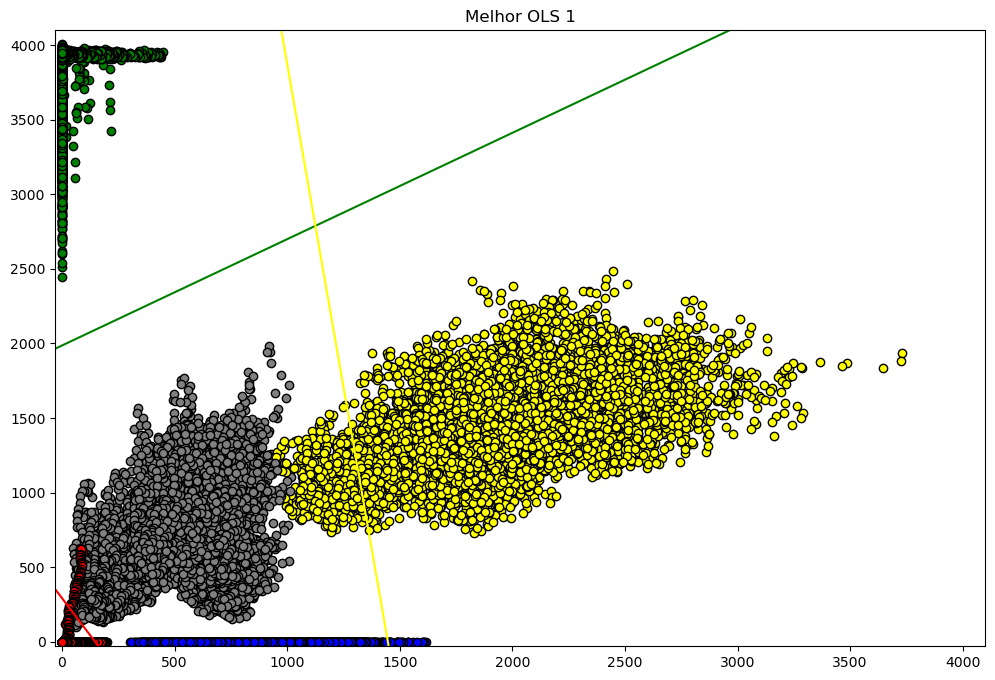

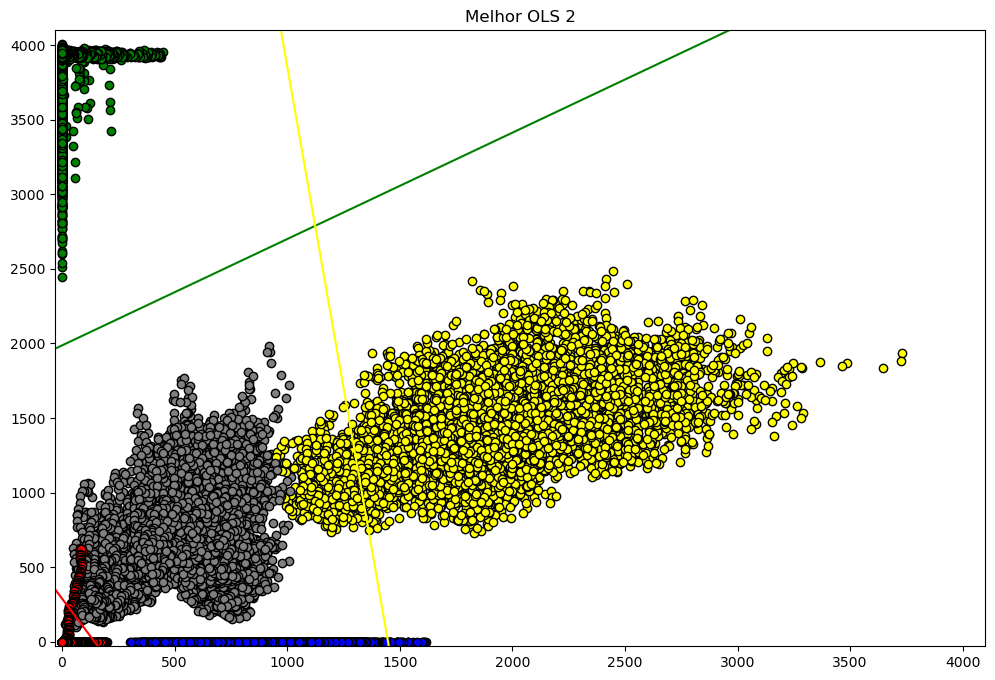

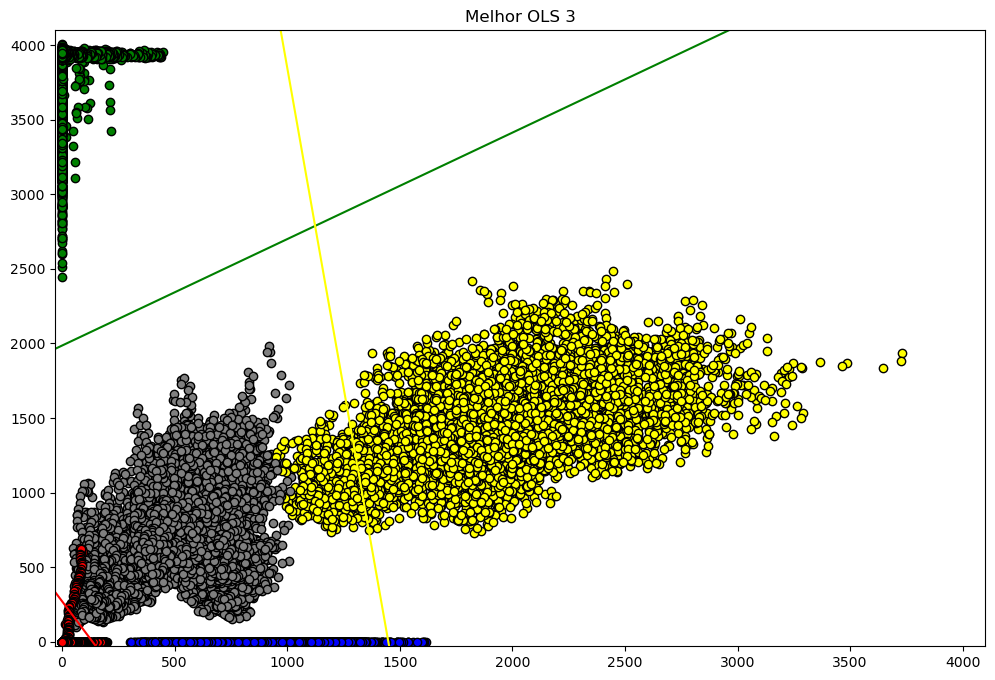

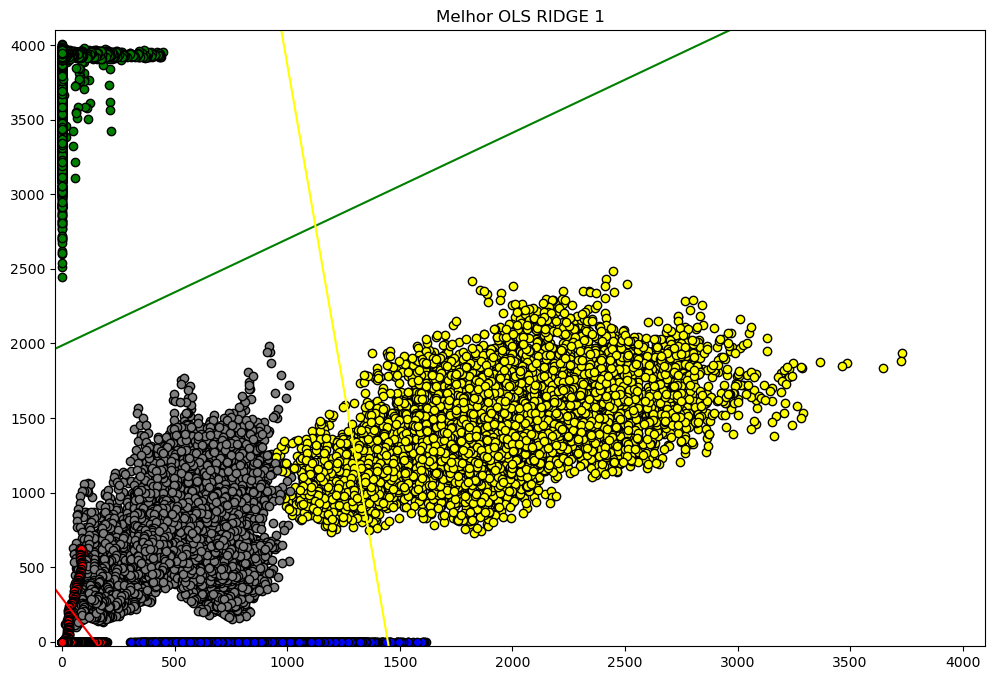

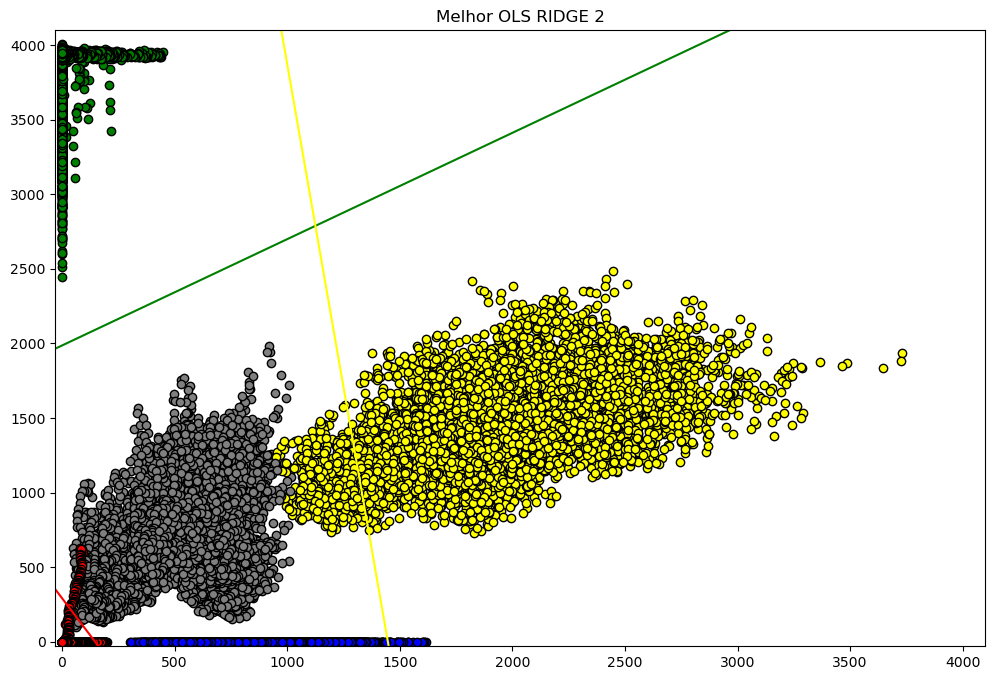

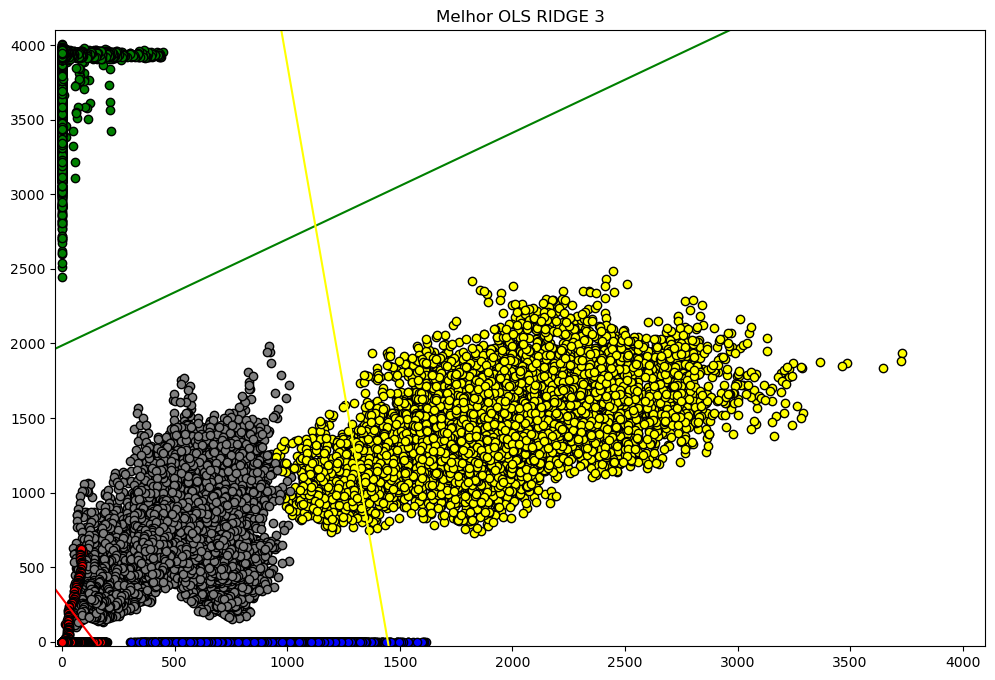

Sumário:
Modelo: OLS
Média: 0.7237
Desvio Padrão: 0.00654790042685439
Maior Valor: 0.7299
Menor Valor: 0.7136
Moda: 0.7136

Sumário:
Modelo: RIDGE
Média: 0.7237
Desvio Padrão: 0.005862485605521759
Maior Valor: 0.7299
Menor Valor: 0.7136
Moda: 0.7136
Melhor valor de lambda: 1e-05

Sumário:
Modelo: KNN
Média: 0.99906
Desvio Padrão: 0.0002880972058177269
Maior Valor: 0.9994
Menor Valor: 0.9987
Moda: 0.999

Sumário:
Modelo: MDC
Média: 0.9609
Desvio Padrão: 0.0003937003937006036
Maior Valor: 0.9613
Menor Valor: 0.9604
Moda: 0.9613



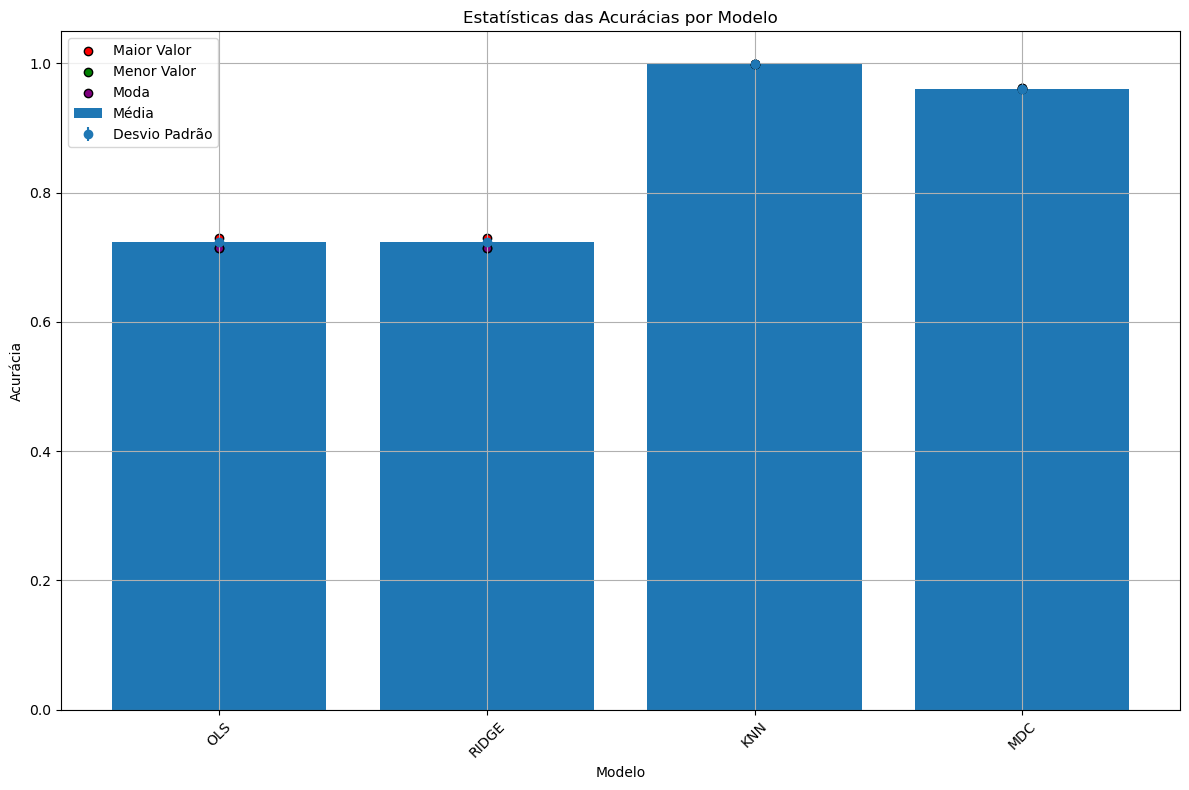

In [19]:
sorted_models = sorted(models_data.items(), key=lambda x: max([entry['accuracy'] for entry in x[1]]) if [entry['accuracy'] for entry in x[1]] else 0, reverse=True)

_, ols_results = sorted_models[2]
_, ridge_results = sorted_models[3]

print(sorted_models)

best_lambda = ridge_results[0]['lambda']

# Carregar dados
X = np.loadtxt("./data/EMG.csv", delimiter=",")
color = ["red", "green", "blue", "gray", "yellow"]

# Gerando os gráficos para os 3 maiores resultados de OLS
for i in range(3):
    plt.figure(i, figsize=(12, 8))
    z = 0

    for j in range(10):
        for k in range(5):
            plt.scatter(X[z : z + 1000, 0], X[z : z + 1000, 1], color=color[k], edgecolors="k")
            z += 1000
    
    W = ols_results[i]['data']
    x_axis = np.linspace(-50, 5000, 2000)

    x21 = -W[0, 0] / W[2, 0] - (W[1, 0] / W[2, 0]) * x_axis
    x22 = -W[0, 1] / W[2, 1] - (W[1, 1] / W[2, 1]) * x_axis
    x23 = -W[0, 2] / W[2, 2] - (W[1, 2] / W[2, 2]) * x_axis
    x24 = -W[0, 3] / W[2, 3] - (W[1, 3] / W[2, 3]) * x_axis
    x25 = -W[0, 4] / W[2, 4] - (W[1, 4] / W[2, 4]) * x_axis

    plt.title(f'Melhor OLS {i + 1}')
    plt.plot(x_axis, x21, color=color[0])
    plt.plot(x_axis, x22, color=color[1])
    plt.plot(x_axis, x23, color=color[2])
    plt.plot(x_axis, x24, color=color[3])
    plt.plot(x_axis, x25, color=color[4])

    plt.xlim(-30, 4100)
    plt.ylim(-30, 4100)

    plt.show()


# Gerando os gráficos para os 3 maiores resultados de OLS
for i in range(3):
    plt.figure(i, figsize=(12, 8))
    z = 0

    for j in range(10):
        for k in range(5):
            plt.scatter(X[z : z + 1000, 0], X[z : z + 1000, 1], color=color[k], edgecolors="k")
            z += 1000
    
    W = ridge_results[i]['data']
    x_axis = np.linspace(-50, 5000, 2000)

    x21 = -W[0, 0] / W[2, 0] - (W[1, 0] / W[2, 0]) * x_axis
    x22 = -W[0, 1] / W[2, 1] - (W[1, 1] / W[2, 1]) * x_axis
    x23 = -W[0, 2] / W[2, 2] - (W[1, 2] / W[2, 2]) * x_axis
    x24 = -W[0, 3] / W[2, 3] - (W[1, 3] / W[2, 3]) * x_axis
    x25 = -W[0, 4] / W[2, 4] - (W[1, 4] / W[2, 4]) * x_axis

    plt.title(f'Melhor OLS RIDGE {i + 1}')
    plt.plot(x_axis, x21, color=color[0])
    plt.plot(x_axis, x22, color=color[1])
    plt.plot(x_axis, x23, color=color[2])
    plt.plot(x_axis, x24, color=color[3])
    plt.plot(x_axis, x25, color=color[4])

    plt.xlim(-30, 4100)
    plt.ylim(-30, 4100)

    plt.show()

statistics_data = {'Modelo': [], 'Média': [], 'Desvio Padrão': [], 'Maior Valor': [], 'Menor Valor': [], 'Moda': []}

# Calcular estatísticas para cada modelo
for model, data in models_data.items():
    accuracies = [entry['accuracy'] for entry in data]
    if len(accuracies) > 0:
        mean = statistics.mean(accuracies)
        stdev = statistics.stdev(accuracies)
        max_value = max(accuracies)
        min_value = min(accuracies)
        mode = statistics.mode(accuracies)
    
        statistics_data['Modelo'].append(model)
        statistics_data['Média'].append(mean)
        statistics_data['Desvio Padrão'].append(stdev)
        statistics_data['Maior Valor'].append(max_value)
        statistics_data['Menor Valor'].append(min_value)
        statistics_data['Moda'].append(mode)

        print("Sumário:")
        print(f"Modelo: {model}")
        print(f"Média: {mean}")
        print(f"Desvio Padrão: {stdev}")
        print(f"Maior Valor: {max_value}")
        print(f"Menor Valor: {min_value}")
        print(f"Moda: {mode}")

        if (model == 'RIDGE'):
            print(f'Melhor valor de lambda: {best_lambda}')
        print()

# Plotar os resultados
plt.figure(figsize=(12, 8))

plt.bar(statistics_data['Modelo'], statistics_data['Média'], label='Média')
plt.errorbar(statistics_data['Modelo'], statistics_data['Média'], yerr=statistics_data['Desvio Padrão'], fmt='o', label='Desvio Padrão')
plt.scatter(statistics_data['Modelo'], statistics_data['Maior Valor'], color='red', label='Maior Valor', edgecolors="k")
plt.scatter(statistics_data['Modelo'], statistics_data['Menor Valor'], color='green', label='Menor Valor', edgecolors="k")
plt.scatter(statistics_data['Modelo'], statistics_data['Moda'], color='purple', label='Moda', edgecolors="k")

plt.title('Estatísticas das Acurácias por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()